In [1]:
import pandas as pd
import numpy as np
import os
import pickle
import matplotlib.pyplot as plt

# load data
df = pd.read_pickle("./dataset/TMNIST_Alphabet.pkl")

# create output directory
output_dir = "./dataset/selected_fonts"
os.makedirs(output_dir, exist_ok=True)

# filter out fonts with exactly 94 characters
font_counts = df.groupby('names').size()
valid_fonts = font_counts[font_counts == 94].index.tolist()

print(f"Found {len(valid_fonts)} fonts with exactly 94 characters")

# randomly select 100 fonts
np.random.seed(42)
selected_fonts = np.random.choice(valid_fonts, size=100, replace=False)

# save each font as a separate pkl file
for font in selected_fonts:
    font_df = df[df['names'] == font]
    records = font_df[['labels', 'image']].to_dict(orient='records')

    with open(os.path.join(output_dir, f"{font}.pkl"), 'wb') as f:
        pickle.dump(records, f)

print(f"saved {len(selected_fonts)} fonts")

Found 2812 fonts with exactly 94 characters
saved 100 fonts


In [2]:
def visualize_font(font_name, font_dir='./dataset/selected_fonts'):
    """Only showing 0-9、A-Z、a-z total 62 different labels"""
    import string
    
    target_chars = set(string.digits + string.ascii_uppercase + string.ascii_lowercase)  # '0-9A-Za-z'

    filepath = os.path.join(font_dir, f"{font_name}.pkl")
    if not os.path.exists(filepath):
        print(f"Font file {filepath} not exist")
        return
    
    with open(filepath, 'rb') as f:
        records = pickle.load(f)

    filtered = [r for r in records if r['labels'] in target_chars]

    filtered = sorted(filtered, key=lambda r: (string.digits + string.ascii_uppercase + string.ascii_lowercase).index(r['labels']))

    print(f"Showing font {font_name} 's {len(filtered)} labels")

    num_chars = len(filtered)
    cols = 11
    rows = (num_chars + cols - 1) // cols

    plt.figure(figsize=(cols * 1.2, rows * 1.2))
    for i, record in enumerate(filtered):
        plt.subplot(rows, cols, i + 1)
        plt.imshow(record['image'], cmap='gray')
        plt.title(record['labels'], fontsize=8)
        plt.axis('off')

    plt.tight_layout(pad=0.3, w_pad=0.2, h_pad=0.4)
    plt.show()

Showing font Cairo-Bold 's 62 labels


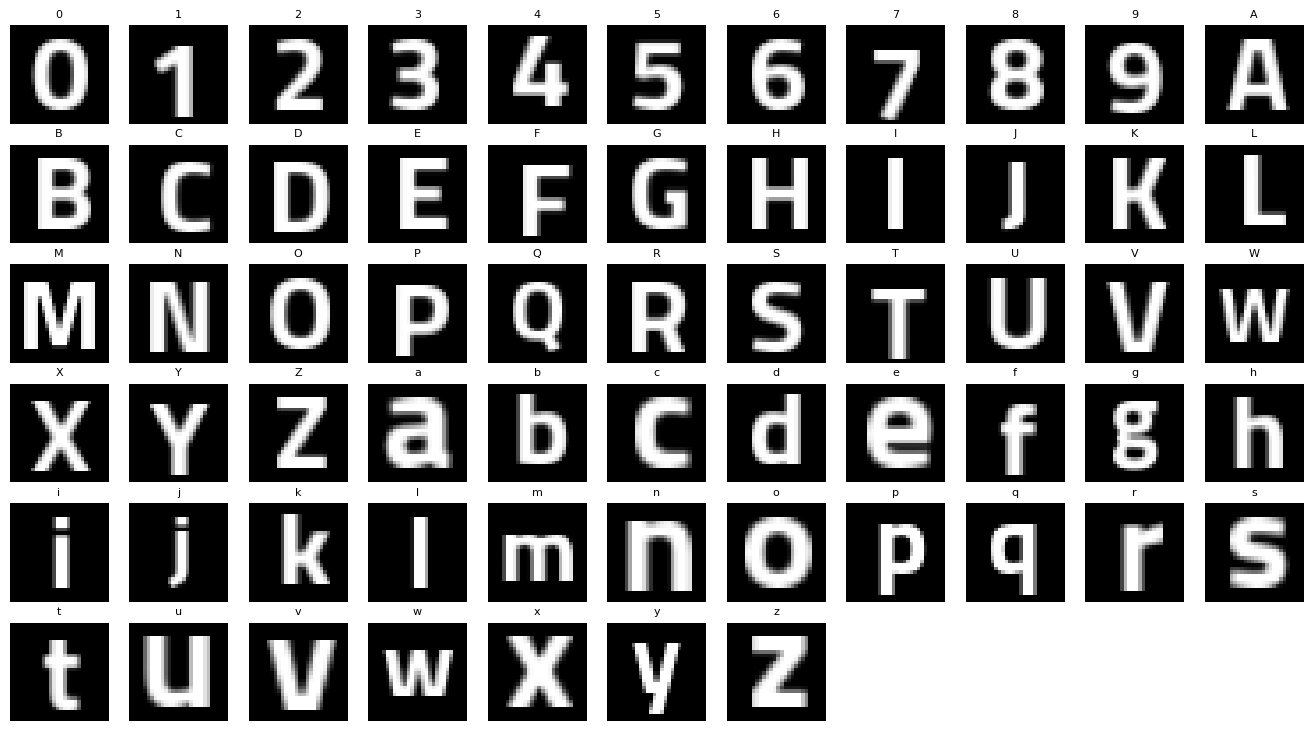

In [3]:
visualize_font("Cairo-Bold") 

Showing font Karma-Regular 's 62 labels


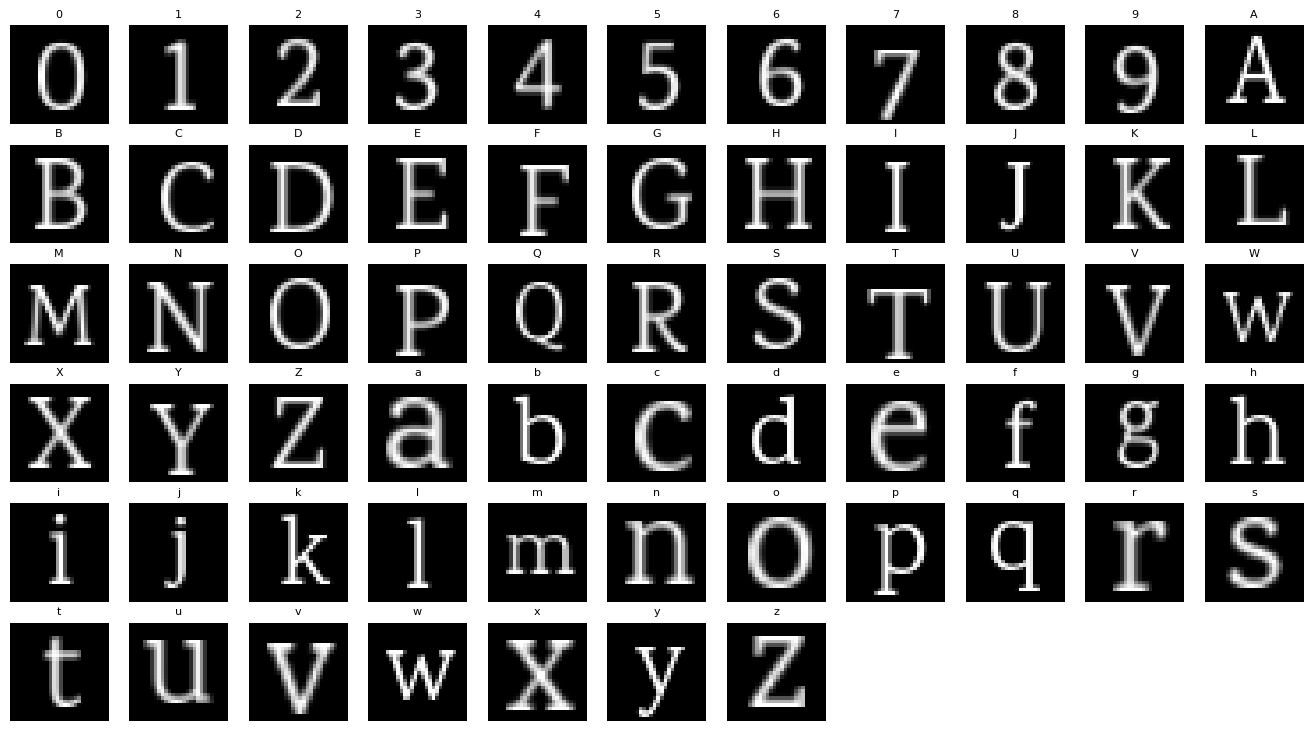

In [4]:
visualize_font("Karma-Regular") 

In [17]:
df_font = pd.read_pickle("./dataset/selected_fonts/Karma-Regular.pkl")
df_font

[{'labels': 'o',
  'image': array([[  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
            0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
            0.,   0.,   0.,   0.,   0.,   0.],
         [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
            0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
            0.,   0.,   0.,   0.,   0.,   0.],
         [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
            0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
            0.,   0.,   0.,   0.,   0.,   0.],
         [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
            0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
            0.,   0.,   0.,   0.,   0.,   0.],
         [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  50.,
          113., 181., 217., 240., 249., 230., 196., 145.,  66.,  21.,   0.,
            0.,   0.,   0.

In [20]:
df_font = pd.read_pickle("./dataset/selected_fonts/Karma-Regular.pkl")
images = np.stack([r['image'] for r in df_font]) 
shape = images.shape
np.savez_compressed("character_font.npz", images=images, shape=shape)

In [ ]:
np.load('character_font.npz')